In [1]:
import pandas as pd
import math

def split_excel_70_15_15(file_path):
    df = pd.read_csv(file_path)

    total_rows = len(df)

    part1_size = math.floor(total_rows * 0.70)
    part2_size = math.floor(total_rows * 0.15)
    part3_size = total_rows - part1_size - part2_size

    part1 = df.iloc[:part1_size]
    part2 = df.iloc[part1_size : part1_size + part2_size]
    part3 = df.iloc[part1_size + part2_size :]

    part1.to_csv("train.csv", index=False)
    part2.to_csv("test.csv", index=False)
    part3.to_csv("val.csv", index=False)

    print("✔ File successfully split into 70% / 15% / 15%")

# Call the function
split_excel_70_15_15("Real estate.csv")



✔ File successfully split into 70% / 15% / 15%


In [2]:

import pandas as pd

def handle_missing_values(train_path, val_path, test_path, strategy="fill"):
    """
    Handle missing values in train, validation, and test files.
    
    - Always compute mean/std ONLY from train.
    - Apply the same filling strategy to val and test.
    """

    # قراءة الملفات
    train = pd.read_csv(train_path)
    val = pd.read_csv(val_path)
    test = pd.read_csv(test_path)

    # حساب المتوسطات من بيانات train فقط
    train_means = train.mean(numeric_only=True)

    # تنظيف ملف واحد (دالة داخلية)
    def clean_file(df):
        df_clean = df.copy()
        for col in df_clean.columns:
            if df_clean[col].dtype in ["float64", "int64"]:

                # تطبيق mean المحسوب من train
                if col in train_means:
                    df_clean[col].fillna(train_means[col], inplace=True)

            else:
                # النصوص → استبدال بالفراغ
                df_clean[col].fillna("", inplace=True)

        return df_clean

    # تنظيف الثلاث ملفات
    train_clean = clean_file(train)
    val_clean = clean_file(val)
    test_clean = clean_file(test)

    print("✔ Missing values handled successfully using train statistics")

    return train_clean, val_clean, test_clean


# ---------------------------
# مثال على الاستخدام
# ---------------------------

train_clean, val_clean, test_clean = handle_missing_values(
    "train.csv",
    "val.csv",
    "test.csv",
    strategy="fill"
)

# حفظ الملفات بعد التصحيح
train_clean.to_csv("train_cleaned.csv", index=False)
val_clean.to_csv("validation_cleaned.csv", index=False)
test_clean.to_csv("test_cleaned.csv", index=False)

print("✔ All cleaned files saved!")


✔ Missing values handled successfully using train statistics
✔ All cleaned files saved!


C:\Users\islam\AppData\Local\Temp\ipykernel_15628\333285491.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(train_means[col], inplace=True)


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# ===== 1. Load the splitted datasets =====
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
val   = pd.read_csv("val.csv")

# ===== 2. Identify target column =====
# عدّل اسم الهدف حسب ملفك (مثلاً price أو Y house price of unit area)
target_col = "Y house price of unit area"

X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

X_test = test.drop(target_col, axis=1)
y_test = test[target_col]

X_val = val.drop(target_col, axis=1)
y_val = val[target_col]

# ===== 3. Scaling =====
scaler = StandardScaler()

# Fit فقط على train — أهم خطوة
X_train_scaled = scaler.fit_transform(X_train)

# Transform val & test
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


# ===== 4. Save scaled features as CSV WITHOUT TARGET =====

# حفظ X_train_scaled فقط
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train_scaled.to_csv("train_scaled.csv", index=False)

# حفظ X_test_scaled فقط
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_test_scaled.to_csv("test_scaled.csv", index=False)

# حفظ X_val_scaled فقط
df_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
df_val_scaled.to_csv("val_scaled.csv", index=False)

# حفظ y لوحدها (اختياري)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)
pd.DataFrame(y_val).to_csv("y_val.csv", index=False)

print("✔️ Scaling completed successfully!")
print("✔️ Files saved WITHOUT merging target:")
print("   → train_scaled.csv (features only)")
print("   → test_scaled.csv  (features only)")
print("   → val_scaled.csv   (features only)")
print("   → y_train.csv, y_test.csv, y_val.csv (target only)")


# ===== 5. Save scaler for future prediction =====
joblib.dump(scaler, "scaler.pkl")

print("✔️ Scaling completed successfully!")
print("✔️ Generated files: train_scaled.csv, test_scaled.csv, val_scaled.csv")

✔️ Scaling completed successfully!
✔️ Files saved WITHOUT merging target:
   → train_scaled.csv (features only)
   → test_scaled.csv  (features only)
   → val_scaled.csv   (features only)
   → y_train.csv, y_test.csv, y_val.csv (target only)
✔️ Scaling completed successfully!
✔️ Generated files: train_scaled.csv, test_scaled.csv, val_scaled.csv


===== Correlation Matrix =====
                                              No  X1 transaction date  \
No                                      1.000000            -0.022081   
X1 transaction date                    -0.022081             1.000000   
X2 house age                           -0.040644             0.012034   
X3 distance to the nearest MRT station -0.009017             0.055162   
X4 number of convenience stores        -0.030966            -0.012442   
X5 latitude                            -0.029520             0.056861   
X6 longitude                           -0.014628            -0.049072   
Target                                 -0.039184             0.079084   

                                        X2 house age  \
No                                         -0.040644   
X1 transaction date                         0.012034   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.050597   
X4 number of convenience stores

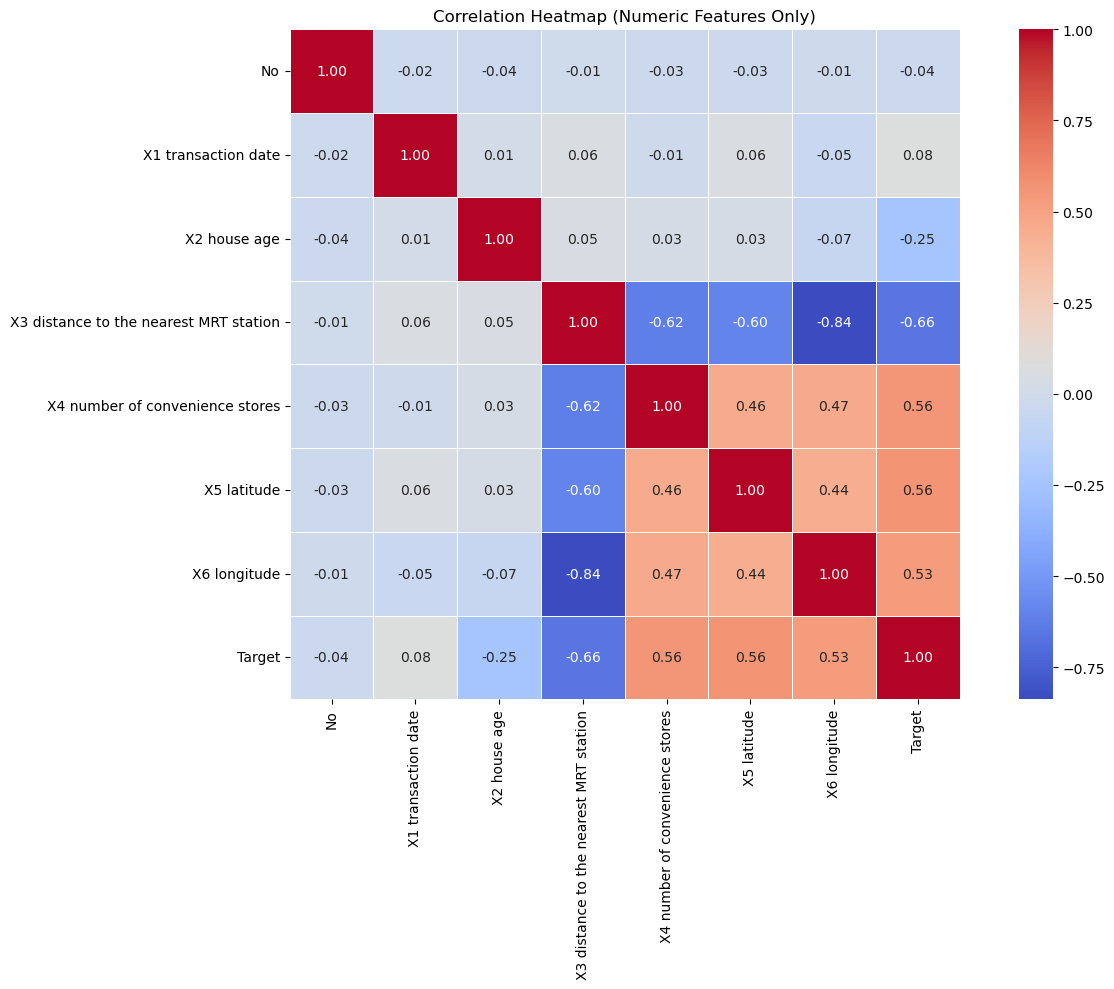


===== Correlation with Target =====
Target                                    1.000000
X5 latitude                               0.562593
X4 number of convenience stores           0.559517
X6 longitude                              0.530660
X1 transaction date                       0.079084
No                                       -0.039184
X2 house age                             -0.248554
X3 distance to the nearest MRT station   -0.662357
Name: Target, dtype: float64


C:\Users\islam\AppData\Local\Temp\ipykernel_15628\3358871378.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


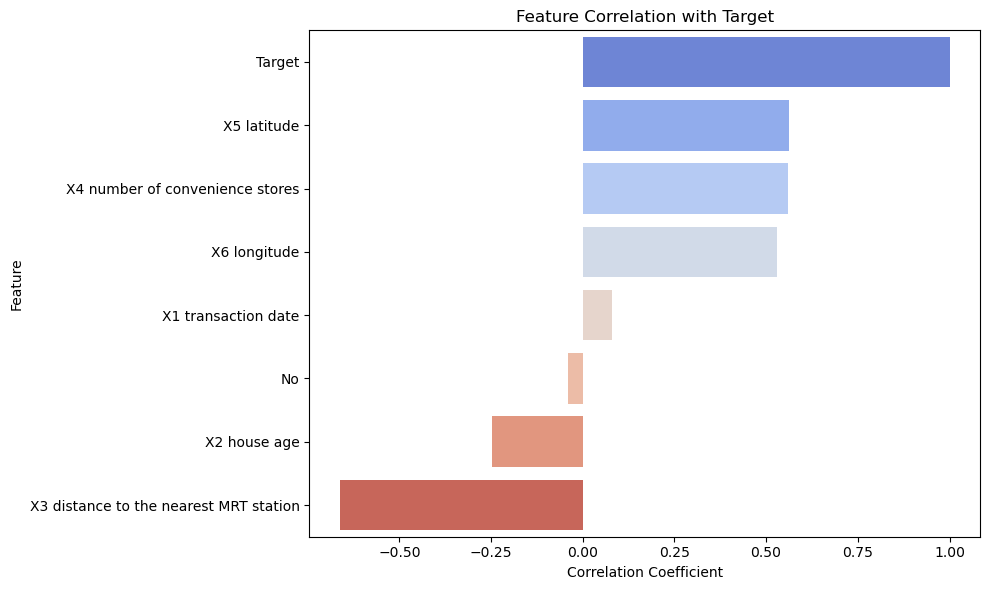

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================================================
# 1. Load scaled training data
# ======================================================
X_train = pd.read_csv("train_scaled.csv")
y_train = pd.read_csv("y_train.csv").squeeze()  # تحويل إلى Series

# دمج الميزات مع الهدف
df = X_train.copy()
df["Target"] = y_train

# ======================================================
# 2. Select ONLY numeric features
# ======================================================
numeric_df = df.select_dtypes(include=["int64", "float64", "float32", "int32"])

# ======================================================
# 3. Compute Correlation Matrix
# ======================================================
corr_matrix = numeric_df.corr()

print("===== Correlation Matrix =====")
print(corr_matrix)

# ======================================================
# 4. Correlation Heatmap (with values inside)
# ======================================================
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# ======================================================
# 5. Correlation with Target ONLY (sorted)
# ======================================================
corr_with_target = corr_matrix["Target"].sort_values(ascending=False)

print("\n===== Correlation with Target =====")
print(corr_with_target)

# ======================================================
# 6. Barplot for correlation with Target
# ======================================================
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="coolwarm"
)
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



📌 Feature correlations with Target (sorted desc):
X5 latitude                               0.562593
X4 number of convenience stores           0.559517
X6 longitude                              0.530660
X2 house age                             -0.248554
X3 distance to the nearest MRT station   -0.662357
Name: Target, dtype: float64


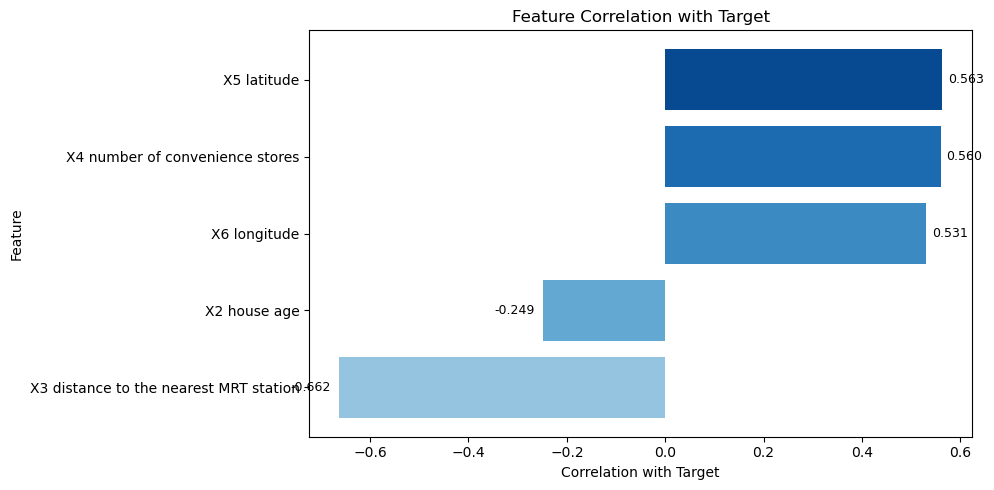

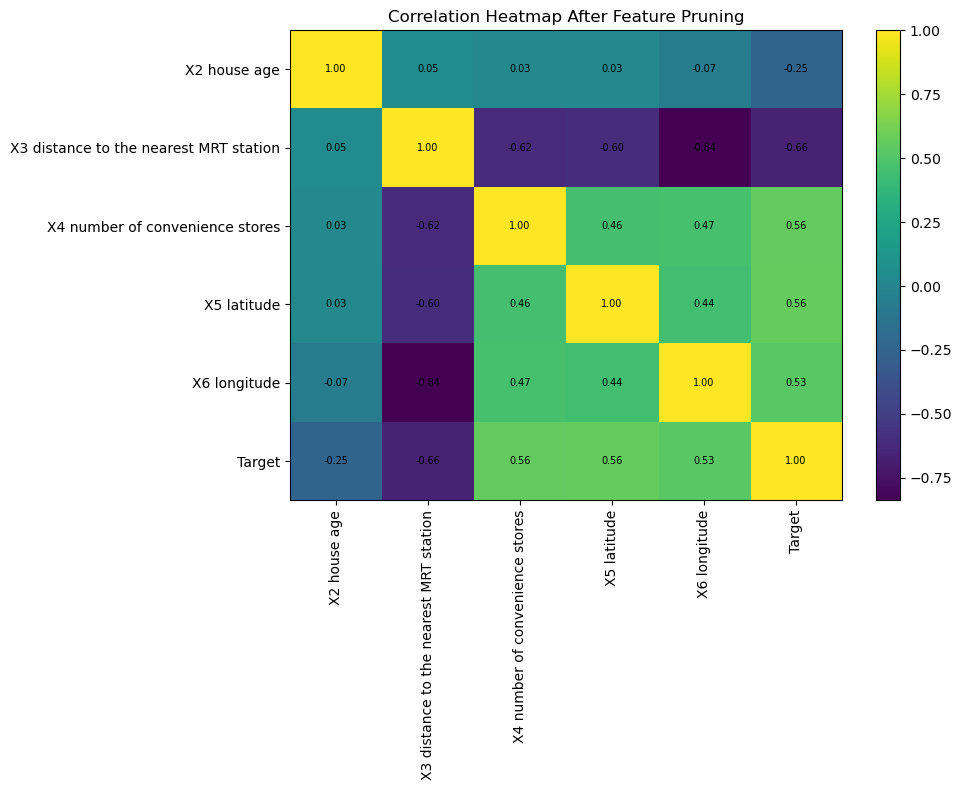


🔻 Dropped for WEAK correlation with target: ['No', 'X1 transaction date']
🔻 Dropped for HIGH inter-feature correlation: []


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

def prune_features_by_correlation(df, target_series, weak_thresh=(-0.1, 0.1), high_corr_thresh=0.85):
    """
    df: DataFrame من الميزات (بدون target).
    target_series: Series الخاصة بالـ Target (طولها يجب أن يطابق عدد صفوف df).
    weak_thresh: حدود الارتباط الضعيف (lower, upper).
    high_corr_thresh: عتبة الترابط العالي بين الميزات لحذف أحدهما.
    """
    df = df.copy().reset_index(drop=True)
    target_series = target_series.reset_index(drop=True)
    target_name = target_series.name if target_series.name else "Target"
    df[target_name] = target_series

    # مصفوفة الارتباط
    corr = df.corr()

    # STEP 1: حذف الميزات ذات الارتباط الضعيف مع Target
    low, high = weak_thresh
    weak_features = corr[target_name][(corr[target_name] > low) & (corr[target_name] < high)].index.tolist()
    weak_features = [f for f in weak_features if f != target_name]

    if weak_features:
        df = df.drop(columns=weak_features)
        corr = df.corr()

    # STEP 2: حذف الميزات ذات الترابط العالي فيما بينها
    features = list(df.columns)
    if target_name in features:
        features.remove(target_name)

    to_drop = set()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            f1, f2 = features[i], features[j]
            if abs(corr.loc[f1, f2]) >= high_corr_thresh:
                corr_f1 = abs(corr.loc[f1, target_name])
                corr_f2 = abs(corr.loc[f2, target_name])
                # احذف الأقل ارتباطاً بالـ target
                if corr_f1 < corr_f2:
                    to_drop.add(f1)
                else:
                    to_drop.add(f2)

    if to_drop:
        df = df.drop(columns=list(to_drop))

    # أخيراً، أعِد DataFrame دون عمود Target
    remaining_df = df.drop(columns=[target_name])
    return remaining_df, sorted(list(to_drop)), sorted(weak_features)


# ------------------------------
# MAIN
# ------------------------------
# تحقق من وجود الملفات
if not os.path.exists("train_scaled.csv"):
    print("خطأ: الملف train_scaled.csv غير موجود في المجلد الحالي.")
    sys.exit(1)
if not os.path.exists("Y_train.csv"):
    print("خطأ: الملف Y_train.csv غير موجود في المجلد الحالي.")
    sys.exit(1)

# قراءة البيانات
df = pd.read_csv("train_scaled.csv")
Y_train = pd.read_csv("Y_train.csv")

# إذا كان Y_train ملف بعمود واحد بدون اسم، نعطيه اسمًا
if Y_train.shape[1] == 1:
    Y_train = Y_train.iloc[:, 0]
else:
    # إذا فيه أكثر من عمود نحاول استخدام عمود اسمه "Target" أو العمود الأول
    if "Target" in Y_train.columns:
        Y_train = Y_train["Target"]
    else:
        Y_train = Y_train.iloc[:, 0]

Y_train = Y_train.squeeze()
Y_train.name = "Target"

# تحقق من تساوي الأطوال
if len(df) != len(Y_train):
    print(f"طول train ({len(df)}) لا يساوي طول Y ({len(Y_train)}). سأقوم بإعادة ضبط الفهارس ومحاذاتها.")
    df = df.reset_index(drop=True)
    Y_train = Y_train.reset_index(drop=True)
    if len(df) != len(Y_train):
        raise ValueError("بعد إعادة الضبط، لا يزال طول train <> طول Y. تحقق من ملفاتك.")

# تطبيق فلترة الميزات
filtered_df, dropped_corr, dropped_weak = prune_features_by_correlation(df, Y_train,
                                                                       weak_thresh=(-0.1, 0.1),
                                                                       high_corr_thresh=0.85)

# إذا لا توجد ميزات متبقية - نوقف التنفيذ بطريقة واضحة
if filtered_df.shape[1] == 0:
    raise RuntimeError("لا توجد ميزات بعد التصفية. عدل العتبات أو تحقق من البيانات.")

# مصفوفة الارتباط بعد التنقية (نضيف Target مرة أخرى لمحسوبة الارتباط)
corr_new = filtered_df.assign(Target=Y_train).corr()

# طباعة الارتباط مع Target (مرتب تنازلياً)
feature_target_corr = corr_new["Target"].drop("Target").sort_values(ascending=False)
print("\n==============================")
print("📌 Feature correlations with Target (sorted desc):")
print("==============================")
print(feature_target_corr)

# ------------------------------
# BAR PLOT (أفقي) مثل الصورة
# ------------------------------
# نرتب من الأقل للأعلى حتى يظهر الأكبر في الأعلى عند رسم barh
corr_values = feature_target_corr.sort_values(ascending=True)

plt.figure(figsize=(10, 5))

# نستخدم تدرج أزرق كما في المثال
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(corr_values)))

bars = plt.barh(corr_values.index, corr_values.values, color=colors)
plt.xlabel("Correlation with Target")
plt.ylabel("Feature")
plt.title("Feature Correlation with Target")

# اضافة قيمة عند نهاية كل شريط، مع مراعاة القيم السالبة
x_min = corr_values.min()
x_max = corr_values.max()
x_range = x_max - x_min if x_max != x_min else abs(x_max) + 0.01

for i, (feat, v) in enumerate(zip(corr_values.index, corr_values.values)):
    # offset ديناميكي حسب مدى القيم
    offset = x_range * 0.01
    text_x = v + offset if v >= 0 else v - offset - 0.005
    ha = 'left' if v >= 0 else 'right'
    plt.text(text_x, i, f"{v:.3f}", va='center', ha=ha, fontsize=9)

plt.tight_layout()
plt.show()

# ------------------------------
# HEATMAP (مع قيم داخل الخلايا)
# ------------------------------
plt.figure(figsize=(10, 8))
plt.imshow(corr_new, interpolation='nearest', aspect='auto')
plt.colorbar()

plt.xticks(np.arange(len(corr_new.columns)), corr_new.columns, rotation=90)
plt.yticks(np.arange(len(corr_new.index)), corr_new.index)

for i in range(len(corr_new.index)):
    for j in range(len(corr_new.columns)):
        value = corr_new.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=7)

plt.title("Correlation Heatmap After Feature Pruning")
plt.tight_layout()
plt.show()

# ------------------------------
# طباعة الميزات المحذوفة
# ------------------------------
print("\n🔻 Dropped for WEAK correlation with target:", dropped_weak)
print("🔻 Dropped for HIGH inter-feature correlation:", dropped_corr)
